<h2>- ali ostovar -
    <h4>#StdNum: 40020994
    <h5>#Ex4-machine learning: logistic regression ------------------- #spring 2022

<h4><b>step 0 :</b></h4> 
    <p>importing libraries based on what we need to solve the problem

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image

<h4><b>step 1 :</b></h4> 
    <p>loading DataSet and showing dataset

In [9]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<h4><b>step 2 :</b></h4> 
    <p>seprate datas and targets to X and Y

In [10]:
X, y = digits['data'], digits['target']
X.shape
#(1797,64)

(1797, 64)

In [11]:
X.shape

(1797, 64)

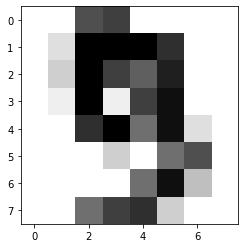

In [12]:
test = X[9]
test_image = test.reshape(8, 8) 
plt.imshow(test_image, cmap = matplotlib.cm.binary, interpolation="nearest")

<h4><b>step 3 :</b></h4> 
    <p>splitting train and test samples by 80/20 ratio

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)
print(f'X_train size: {X_train.shape} \t y_train size: {y_train.shape} \nX_test size: {X_test.shape} \t y_test size: {y_test.shape}')

#X_train size: (1437, 64) 	 y_train size: (1437,) 
#X_test size: (360, 64) 	 y_test size: (360,)

X_train size: (1437, 64) 	 y_train size: (1437,) 
X_test size: (360, 64) 	 y_test size: (360,)


<h4><b>step 4 :</b></h4> 
    <p>setting up our regression model and fit model with LogisticRegression

In [14]:
logisticRegression= LogisticRegression(solver='liblinear', C=0.001, multi_class='auto', random_state=0)
logisticRegression.fit(X_train,y_train)

LogisticRegression(C=0.001, random_state=0, solver='liblinear')

<h4><b>step 5 :</b></h4> 
    <p>showing accuracy of training and testing phase when C = 0.001

In [15]:
print(f'Accuracy of training set when (c = 0.001) : {logisticRegression.score(X_train,y_train)}')
#Accuracy of training set : 0.965205288796103

Accuracy of training set when (c = 0.001) : 0.965205288796103


In [16]:
y_pred = logisticRegression.predict(X_test)
print(f'Accuracy of testing set : {logisticRegression.score(X_test,y_test)}')
#Accuracy of testing set : 1.0

Accuracy of testing set : 0.9527777777777777


<h4><b>step 6 :</b></h4> 
    <p>setting up model with c = 0.3 then refit the model and predic it. after that we calculate accuracy in train and test

In [17]:
#c=0.3
logisticRegression= LogisticRegression(solver='liblinear', C=0.3, multi_class='auto', random_state=0)
logisticRegression.fit(X_train,y_train)
y_pred = logisticRegression.predict(X_test)

print(f'Accuracy of training set when (c = 0.3) : {logisticRegression.score(X_train,y_train)}')
print(f'Accuracy of testing set when (c = 0.3) : {logisticRegression.score(X_test,y_test)}')
#Accuracy of training set when (c = 0.3) : 0.9937369519832986
#Accuracy of testing set when (c = 0.3) : 1.0

Accuracy of training set when (c = 0.3) : 0.9937369519832986
Accuracy of testing set when (c = 0.3) : 0.9722222222222222


<h4><b>step 7 :</b></h4> 
    <p>plotting confusion matrix

<AxesSubplot:>

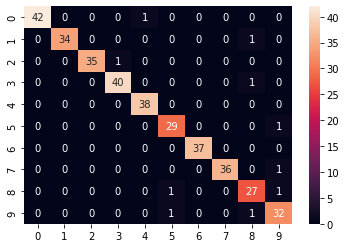

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

<h4><b>step 8 :</b></h4> 
    <p>in this part we wanna predict a given handwriten number with our model. for this job first we have to convert photo to grayscale <br>then reshape it to 8 * 8 pixel now we're ready to predict

In [21]:
testImg = Image.open("IMG_54577.PNG").convert('L')
imgArray = np.array(testImg)
imgArray

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 254, 255, 255, 254,   1,   0],
       [  1,   0, 255,   0,   0, 255,   0,   1],
       [  0, 255,   0,   1,   1,   0, 255,   0],
       [  1, 255,   0,   0,   0,   0, 255,   1],
       [  0, 255,   0,   1,   1,   0, 255,   0],
       [  0,   1, 255, 254, 254, 255,   1,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0]], dtype=uint8)

In [20]:
myNumber0=logisticRegression.predict(imgArray.reshape(1,-1))
print(f'The Predicted Number is : {myNumber0}')
#The Predicted Number is : [0]

The Predicted Number is : [0]
